In [1]:
! pip freeze

asttokens==3.0.0
colorama==0.4.6
comm==0.2.2
debugpy==1.8.9
decorator==5.1.1
executing==2.1.0
ipykernel==6.29.5
ipython==8.30.0
jedi==0.19.2
jupyter_client==8.6.3
jupyter_core==5.7.2
matplotlib-inline==0.1.7
nest-asyncio==1.6.0
packaging==24.2
parso==0.8.4
platformdirs==4.3.6
prompt_toolkit==3.0.48
psutil==6.1.0
pure_eval==0.2.3
Pygments==2.18.0
python-dateutil==2.9.0.post0
pywin32==308
pyzmq==26.2.0
six==1.16.0
stack-data==0.6.3
tornado==6.4.2
traitlets==5.14.3
wcwidth==0.2.13


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re

In [4]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score
from scipy.stats import ks_2samp

In [5]:
import warnings

# Dataset Import

In [10]:
df = pd.read_excel("/Users/user/Documents/Projet_Covid/Data/dataset.xlsx") #PATH
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.shape

(5644, 111)

# Displaying Missing Values

In [13]:
df.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [12]:
pd.set_option('display.max_columns', 500)

In [14]:
df.columns.tolist()

['Patient ID',
 'Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasma pneumoniae',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Neutrophils',
 'Urea',

## Column Description

It would take a long time to describe the columns one by one, but overall we can observe different types of data: firstly, data relating to patient identification and sras cov2 positivity, with an indication of the severity of the infection; secondly, blood data or data relating to urine and hepatology; thirdly, data indicating the presence of certain antibodies in the patient.

In [17]:
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Identifying the target variable

In [18]:
target=['SARS-Cov-2 exam result']

We start by mapping some categorical data into numerical form

In [19]:
# Transform to numeric
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].map({'positive': 1, 'negative': 0})

# Map detected/not_detected and positive/negative to 1 and 0
df = df.replace({'positive': 1, 'negative': 0, 'detected': 1, 'not_detected': 0})

df['SARS-Cov-2 exam result'].value_counts(normalize=True)

C:\Users\user\AppData\Local\Temp\ipykernel_3692\1888857514.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'positive': 1, 'negative': 0, 'detected': 1, 'not_detected': 0})


SARS-Cov-2 exam result
0    0.901134
1    0.098866
Name: proportion, dtype: float64

90% of negative exam result and 10% of positive exam results among the patients

# Nan Clearing

As you can see, there are a lot of null values in most columns, so we need to establish a strategy to keep only usable data.

In [20]:
df[df.columns[df.isna().any()]]

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

We print the percentage of null values per column

In [21]:
df_null_pct = df.isna().mean().round(4) * 100 #2 digits

df_null_pct.sort_values(ascending=False)

Mycoplasma pneumoniae                                    100.0
Prothrombin time (PT), Activity                          100.0
D-Dimer                                                  100.0
Urine - Sugar                                            100.0
Partial thromboplastin time (PTT)                        100.0
                                                         ...  
Patient age quantile                                       0.0
Patient addmited to regular ward (1=yes, 0=no)             0.0
SARS-Cov-2 exam result                                     0.0
Patient addmited to intensive care unit (1=yes, 0=no)      0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.0
Length: 111, dtype: float64

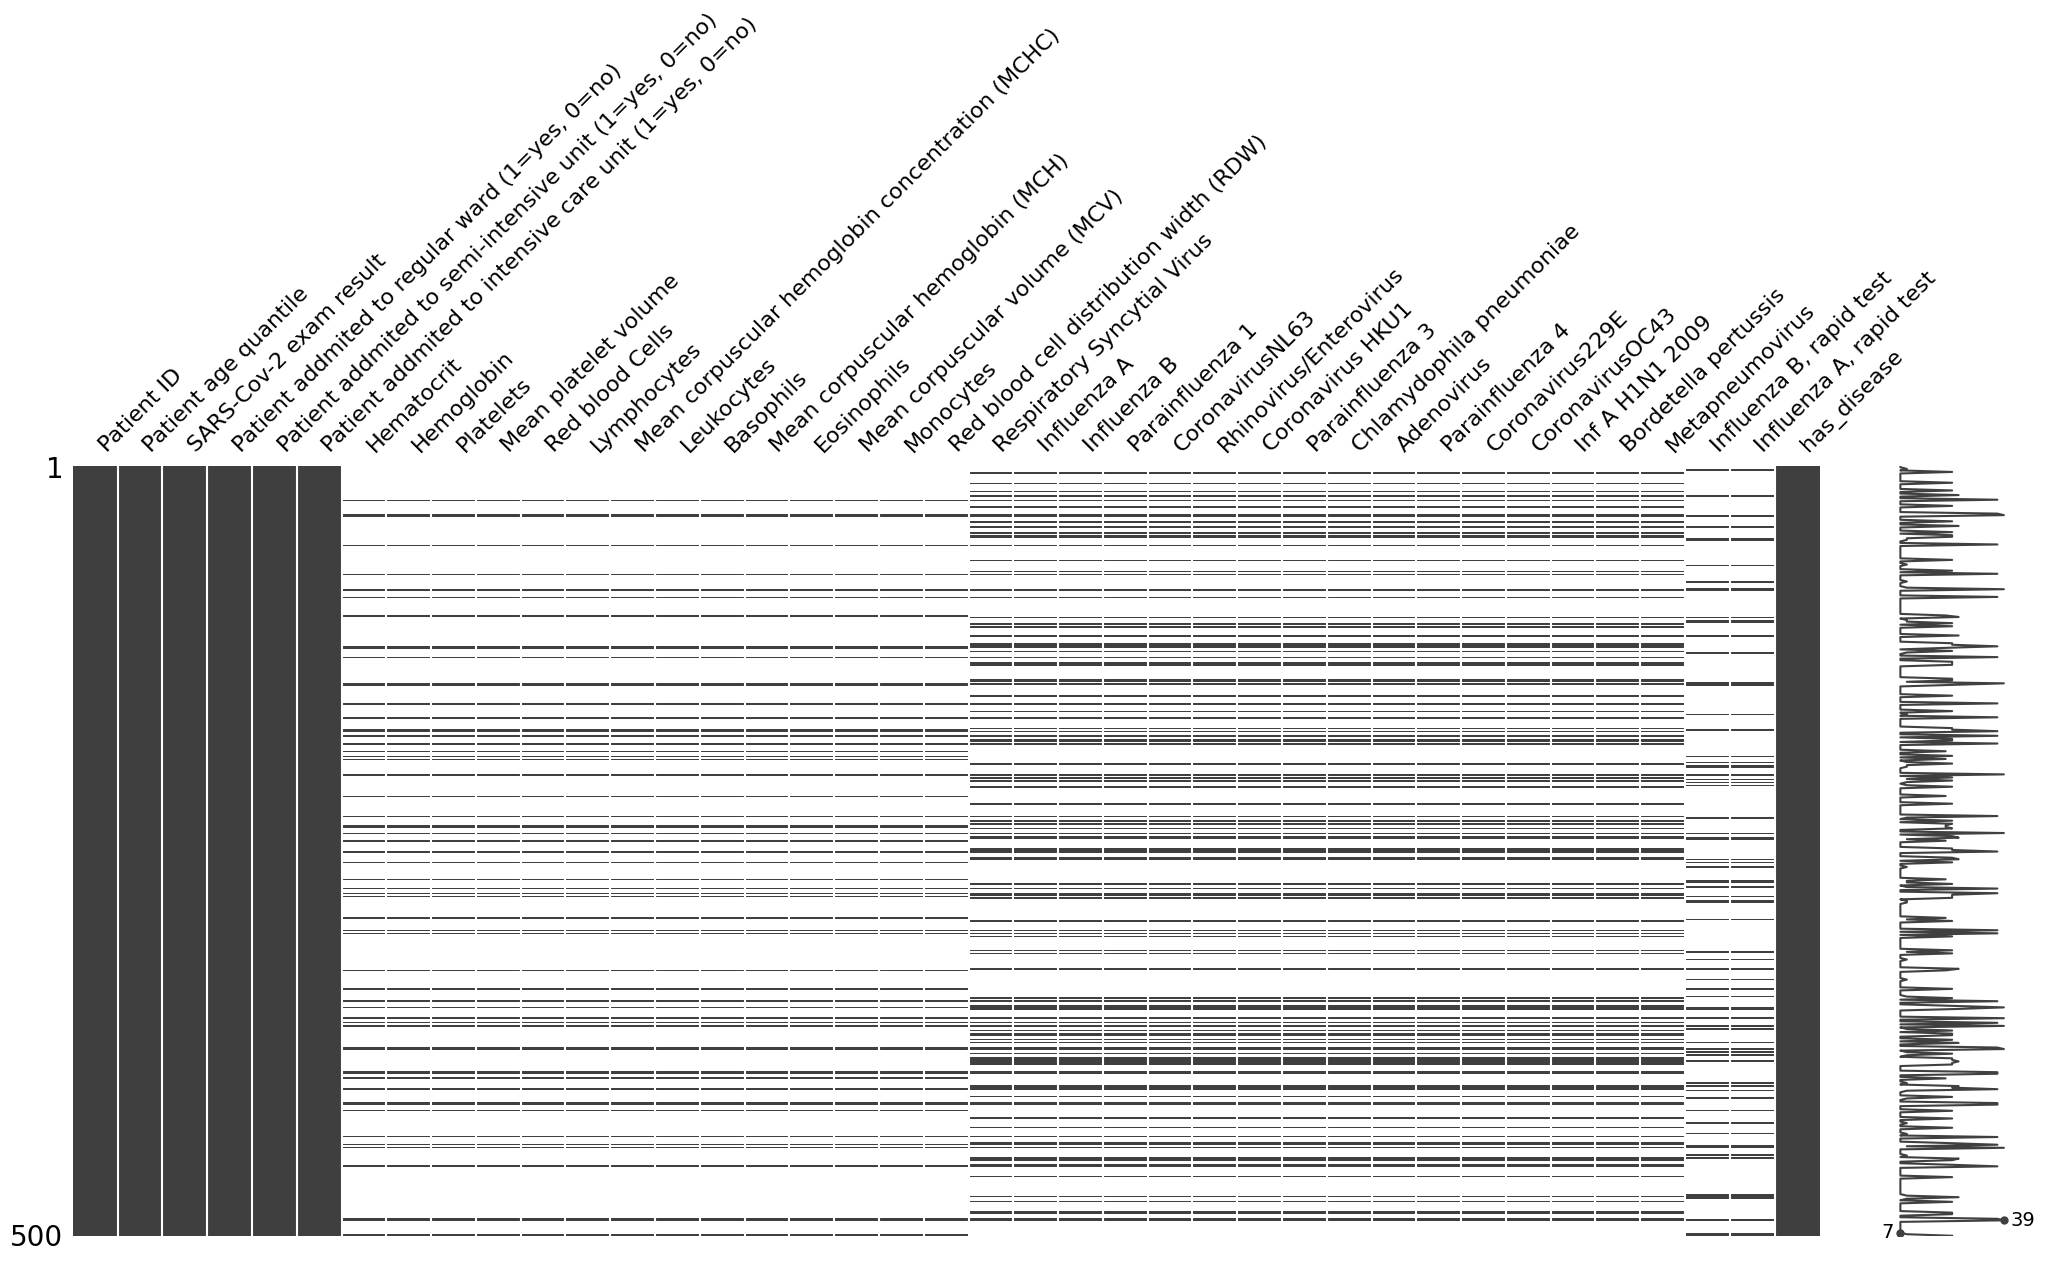

In [39]:
import missingno as msno

ax=msno.matrix(df.sample(500))

Correlation of missing values

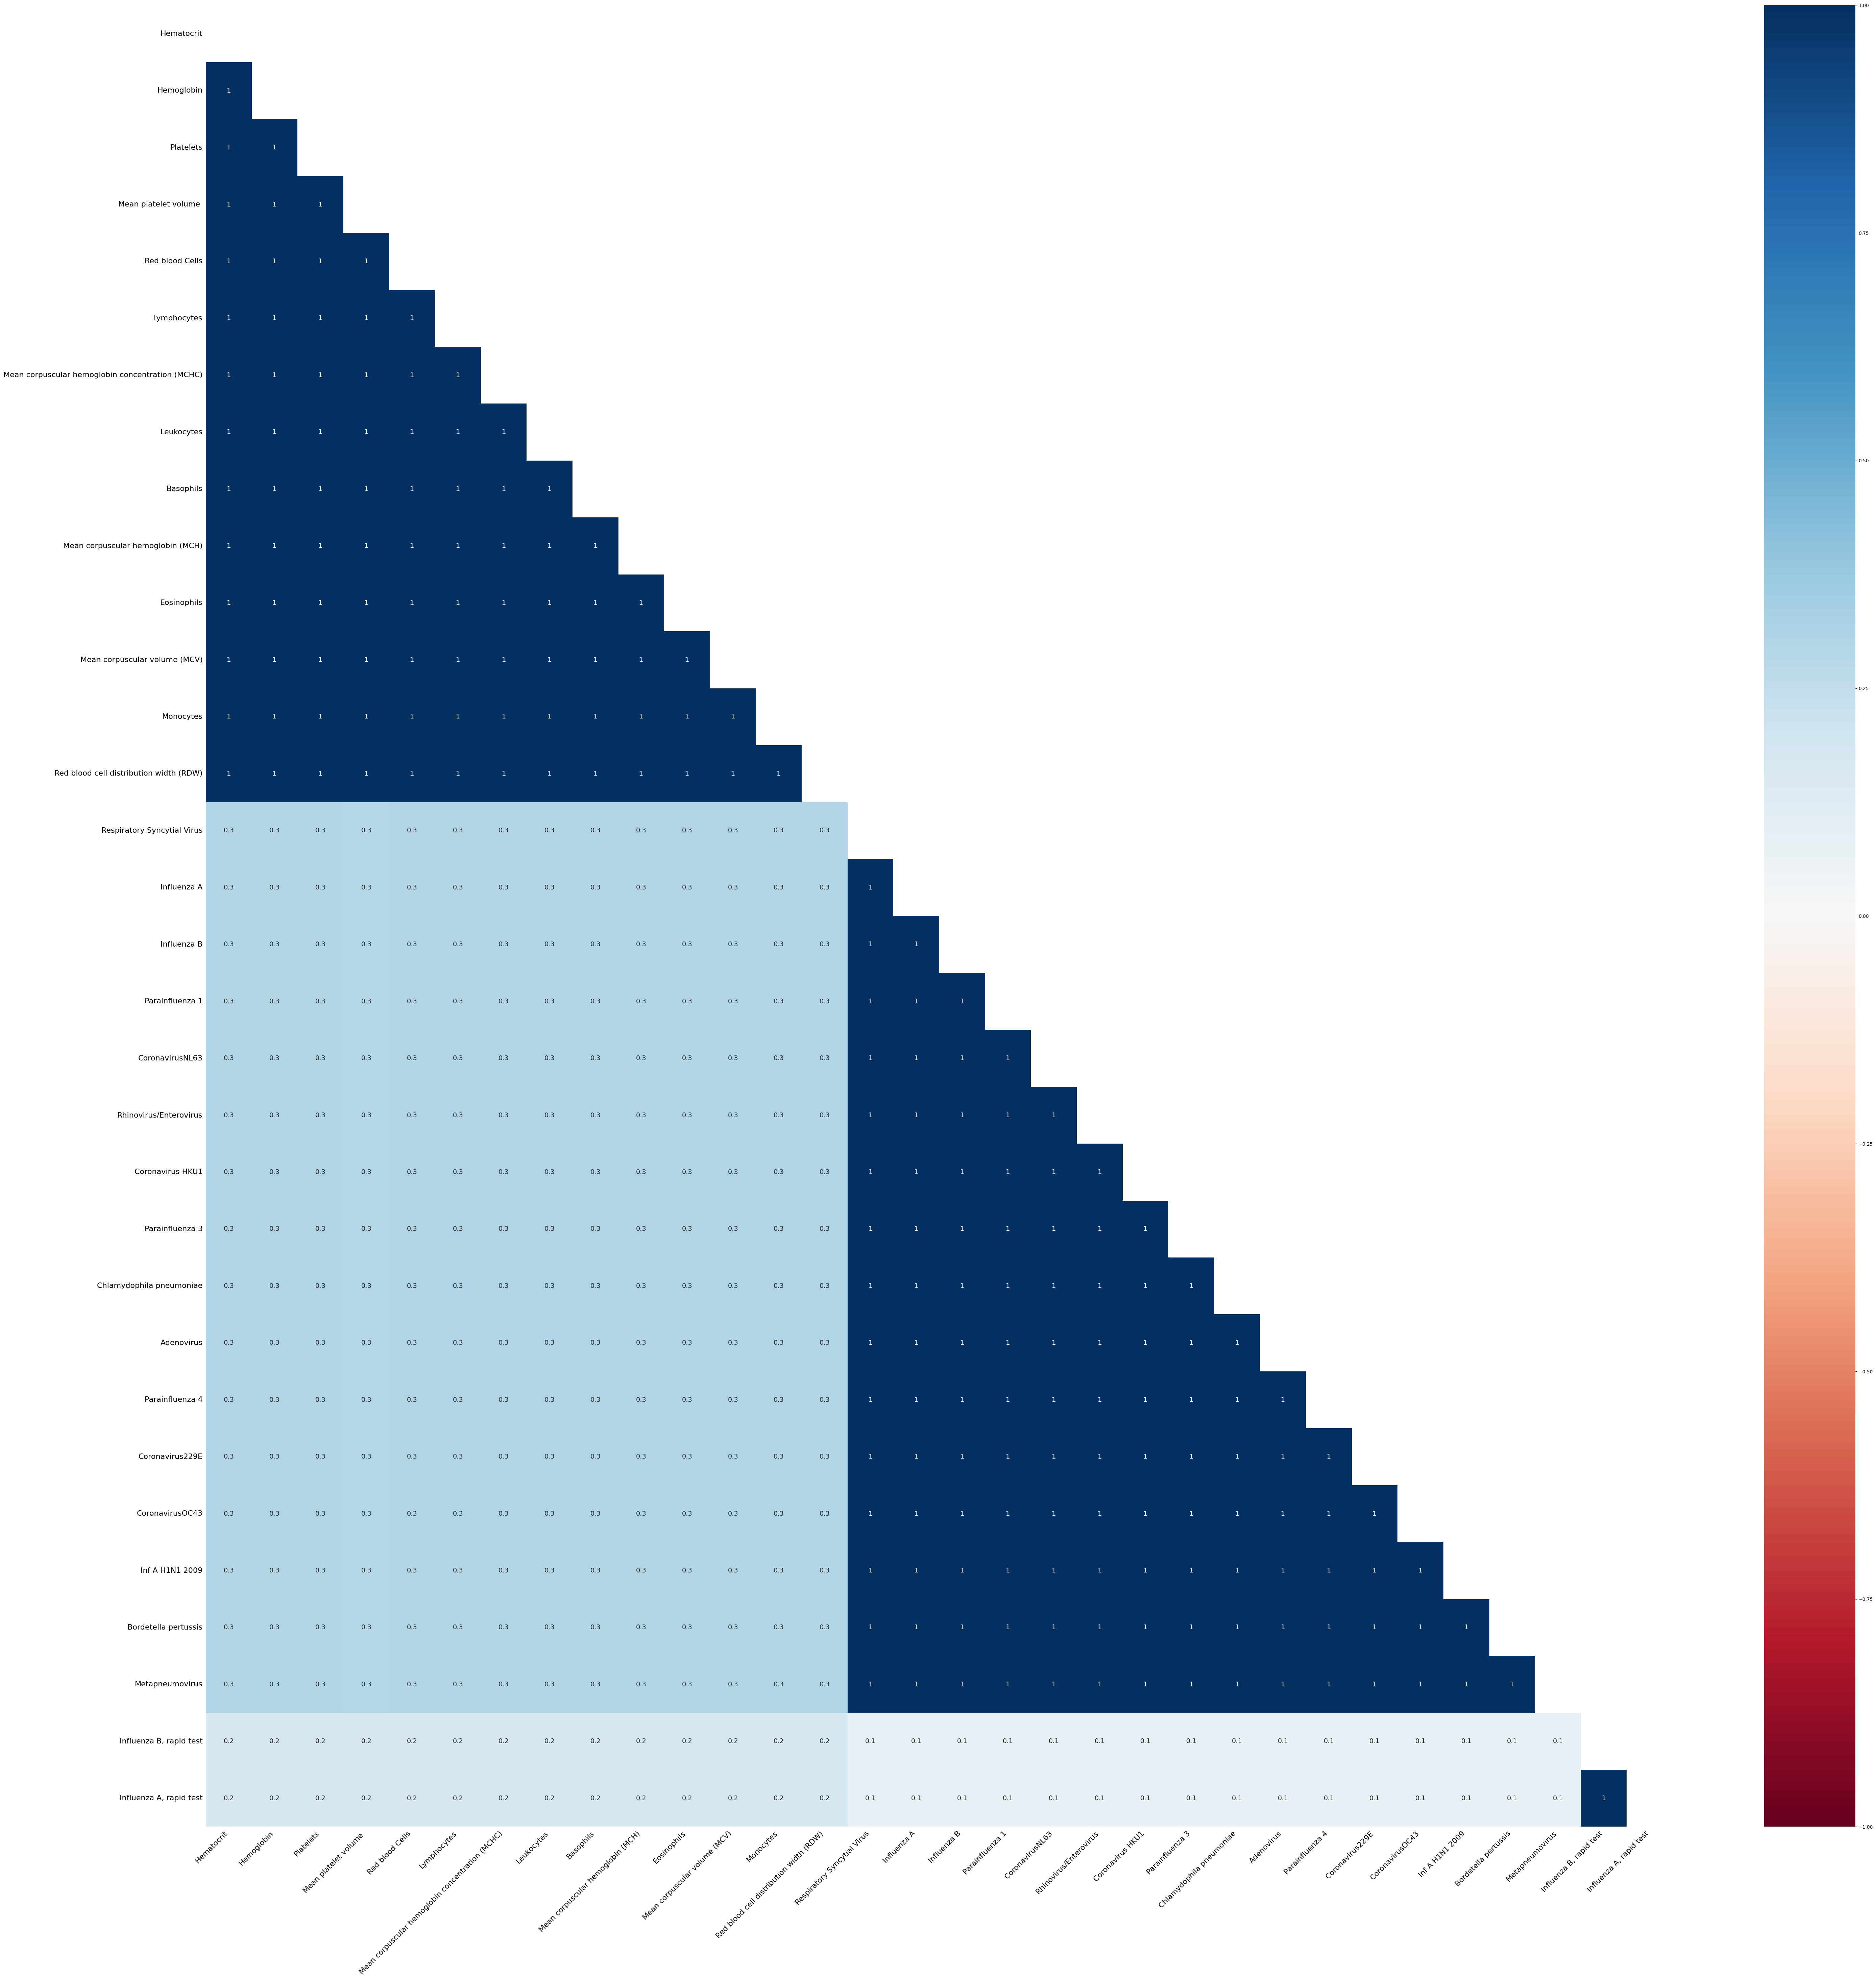

In [44]:
ax=msno.heatmap(df,figsize=(70,70))


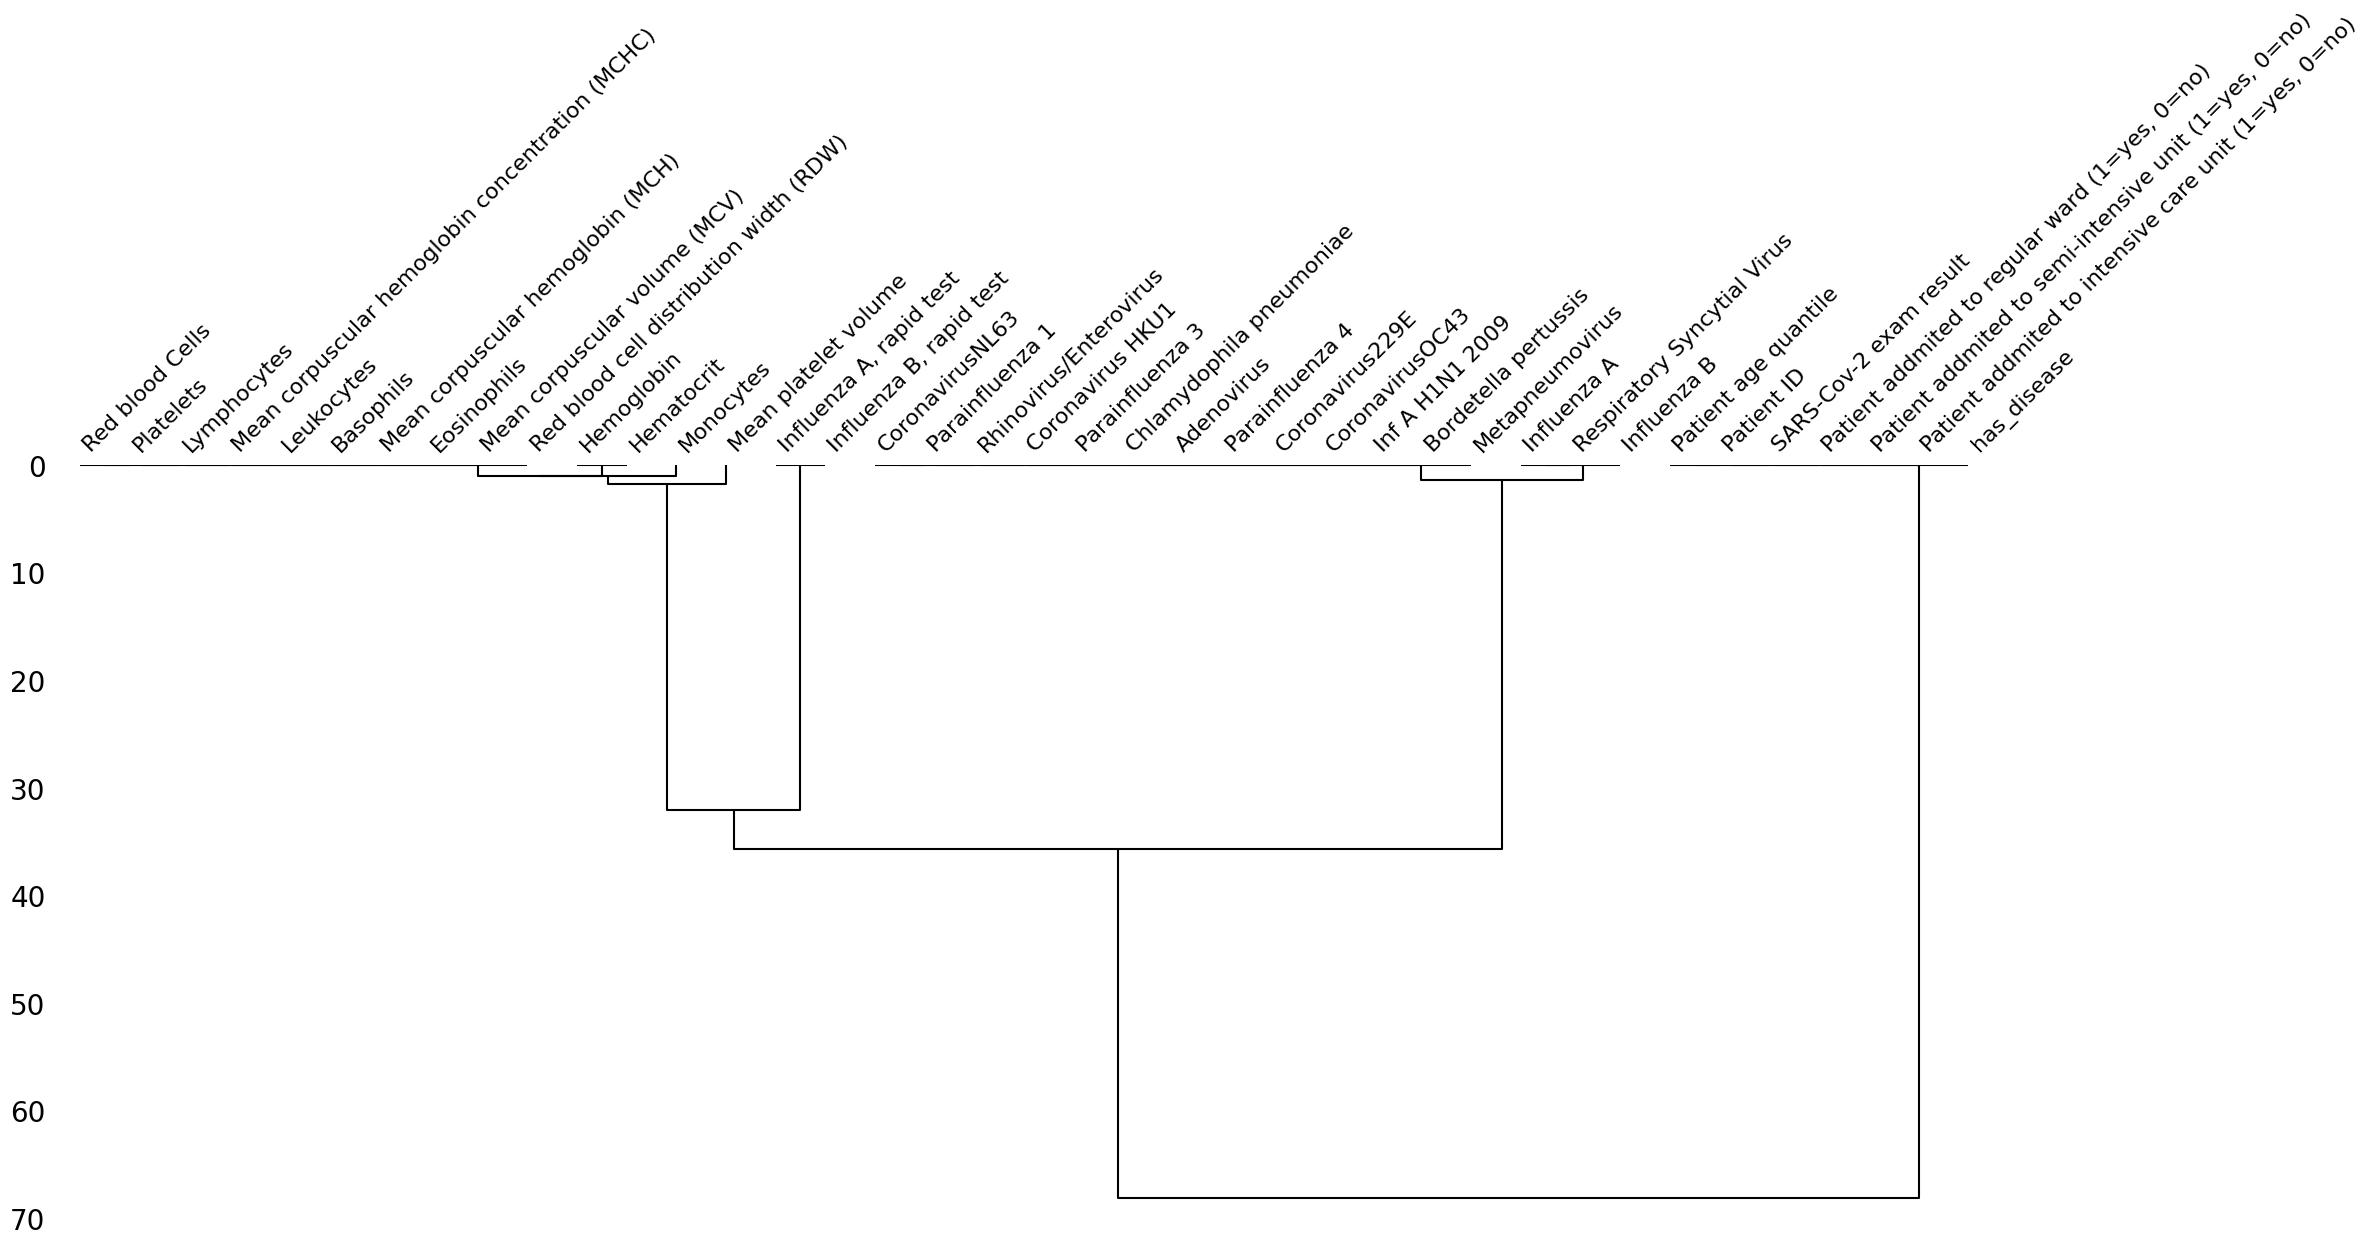

In [45]:
ax=msno.dendrogram(df)

Some columns only have null values, so we'll need to delete them, but first we'll need to determine the distribution of these null values.

<Axes: ylabel='Frequency'>

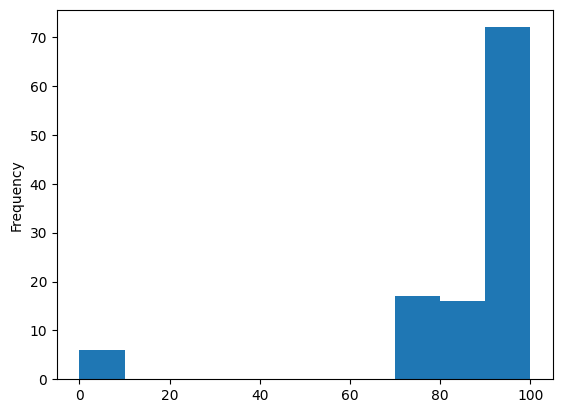

In [22]:
df_null_pct.plot(kind='hist')

Most of the features in the dataset have more than 70% null values, we also have a majority of features that are more than 90% null, so we will have to make choices. One solution could be to average certain values with respect to non-null values, but here there is a lot of missing data, so we will choose to delete features containing more than 90% NaN.

In [23]:
nulls = df_null_pct[df_null_pct > 90]

df = df[[col for col in df.columns if col not in nulls]] #We only keep columns with less than 90% missing values

df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [24]:
df.shape

(5644, 39)

We only have 39 features left out of the 111, but we still need to make adjustments.

In [25]:
features = [col for col in df.columns if col not in ['Patient ID', 
                                                    'Patient addmited to regular ward (1=yes, 0=no)',
                                                    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                                                    'Patient addmited to intensive care unit (1=yes, 0=no)',
                                                    'SARS-Cov-2 exam result']]
pd.set_option('display.max_rows', 1000)
print(df[features].var())

Patient age quantile                                33.384166
Hematocrit                                           1.001661
Hemoglobin                                           1.001661
Platelets                                            1.001664
Mean platelet volume                                 1.001672
Red blood Cells                                      1.001664
Lymphocytes                                          1.001664
Mean corpuscular hemoglobin concentration (MCHC)     1.001664
Leukocytes                                           1.001664
Basophils                                            1.001664
Mean corpuscular hemoglobin (MCH)                    1.001664
Eosinophils                                          1.001664
Mean corpuscular volume (MCV)                        1.001664
Monocytes                                            1.001667
Red blood cell distribution width (RDW)              1.001664
Respiratory Syncytial Virus                          0.036957
Influenz

Parainfluenza 2 feature got a 0 variance so we can delete it 

In [26]:
df.drop('Parainfluenza 2', axis=1, inplace=True)
features.remove('Parainfluenza 2')

19 Columns in the dataframe relate to antibodies present or not present in the patient, indicating infection or not with a disease, these variables are binary. When we analyze them one by one, the number of null values is very high. But if we increase the sum, the null percentage decreases. This variable indicates, for each patient, whether at least one of these variables is positive.

I make the assumption of filling in the remaining null values: if all these columns are null, I assume that the patient has none of these diseases (has_disease = 0). There may be cases where this is false and the person simply hasn't been tested, but it can be a good approximation.

In [27]:
df['has_disease'] = df[df.columns[20:]].sum(axis=1) #Creation of a new feature

df.loc[df['has_disease'] > 1, 'has_disease'] = 1

df['has_disease'].value_counts(normalize=True)

has_disease
0.0    0.865344
1.0    0.134656
Name: proportion, dtype: float64

13% of patients contracted a disease other than Covid 19


In [28]:
df[df['has_disease'] == 1]['SARS-Cov-2 exam result'].value_counts(normalize=True)

SARS-Cov-2 exam result
0    0.981579
1    0.018421
Name: proportion, dtype: float64

But only 2% of sick patients contracted COVID 19, compared with 10% in the database as a whole.


In [29]:
df_clean=df.copy()

In [30]:
print('Total Columns: ', df_clean.shape[1])
df_clean.isna().sum(axis=1).value_counts()

Total Columns:  39


32    3596
16     917
30     458
2      263
14     166
18     139
0       99
3        4
29       1
27       1
Name: count, dtype: int64

There are 3596 rows out of 5644 which have 32 columns with NaN on 39


In [31]:
df_red = df_clean[df_clean.isna().sum(axis=1) < 26]

df_red.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",has_disease
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.36455,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
9,5f1ed301375586c,17,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
13,0fbafd910aa8078,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


We take the rows with less than 26 null columns (rows containing 27 or 29 null columns being unique and taking into account the large number of rows with 30 or 32 null columns).


In [32]:
df_red.shape

(1588, 39)

In [98]:
df_null_pct = df_red.isna().mean().round(4) * 100

df_null_pct.sort_values(ascending=False)

Influenza A, rapid test                                  77.20
Influenza B, rapid test                                  77.20
Mean platelet volume                                     62.28
Monocytes                                                62.15
Red blood cell distribution width (RDW)                  62.09
Lymphocytes                                              62.09
Mean corpuscular volume (MCV)                            62.09
Mean corpuscular hemoglobin (MCH)                        62.09
Basophils                                                62.09
Leukocytes                                               62.09
Mean corpuscular hemoglobin concentration (MCHC)         62.09
Eosinophils                                              62.09
Red blood Cells                                          62.09
Hemoglobin                                               62.09
Hematocrit                                               62.09
Platelets                                              

We can see that the blood variables have an equal number of zero values. For my modelling, I will only consider the rows containing complete data on the blood variables. Hopefully, the effect of the other columns will be concentrated on the “has_disease” variable. In this way, we can keep both “types” of variables in the model.



In [33]:
df_red = df_red[df_red['Leukocytes'].notna()]

df_null_pct = df_red.isna().mean().round(4) * 100

df_null_pct.sort_values(ascending=False)

Influenza A, rapid test                                  67.44
Influenza B, rapid test                                  67.44
Influenza A                                              39.20
Respiratory Syncytial Virus                              39.20
Influenza B                                              39.20
Coronavirus229E                                          39.20
CoronavirusOC43                                          39.20
Metapneumovirus                                          39.20
Inf A H1N1 2009                                          39.20
Chlamydophila pneumoniae                                 39.20
Parainfluenza 3                                          39.20
CoronavirusNL63                                          39.20
Parainfluenza 1                                          39.20
Adenovirus                                               39.20
Bordetella pertussis                                     39.20
Coronavirus HKU1                                       

We replace the remaining zero values by the mean

In [34]:
df_red.loc[df_red['Mean platelet volume '].isna(), 'Mean platelet volume '] = df_red['Mean platelet volume '].mean()

df_red.loc[df_red['Monocytes'].isna(), 'Monocytes'] = df_red['Monocytes'].mean()

We keep only the variables relating to the blood test and the indication showing whether or not the patient is infected 'has_disease'.


In [35]:
cols_to_remove = [c for c in df_red.columns[20:-1]]
df_feat = df_red.drop(cols_to_remove, axis=1)

#update features
features = [c for c in df_feat.columns if c not in ['Patient ID', 'SARS-Cov-2 exam result',
                                                   'Patient addmited to regular ward (1=yes, 0=no)',
                                                   'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                                                   'Patient addmited to intensive care unit (1=yes, 0=no)']]

df_feat.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,1.0
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0
15,6c9d3323975b082,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,1.0
18,d3ea751f3db9de9,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,1.0
22,2c2eae16c12a18a,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0.0


In [36]:
df.shape


(5644, 39)

In [37]:
df_red.shape

(602, 39)

In [38]:
df_feat.shape

(602, 21)

We've gone from a dataframe of 5644 rows for 39 columns to a dataframe of 602 rows for 21 columns, in the hope that the resulting batch of data will be sufficient to achieve satisfactory performance, otherwise we'll have to change the way we handle null data.


In [46]:
df_feat.isna().sum().sum()

np.int64(0)

No more missing values

Now we'll take a look at the correlations between the variables. The study of correlations gives us an idea of which variables are most important for the target variable. 


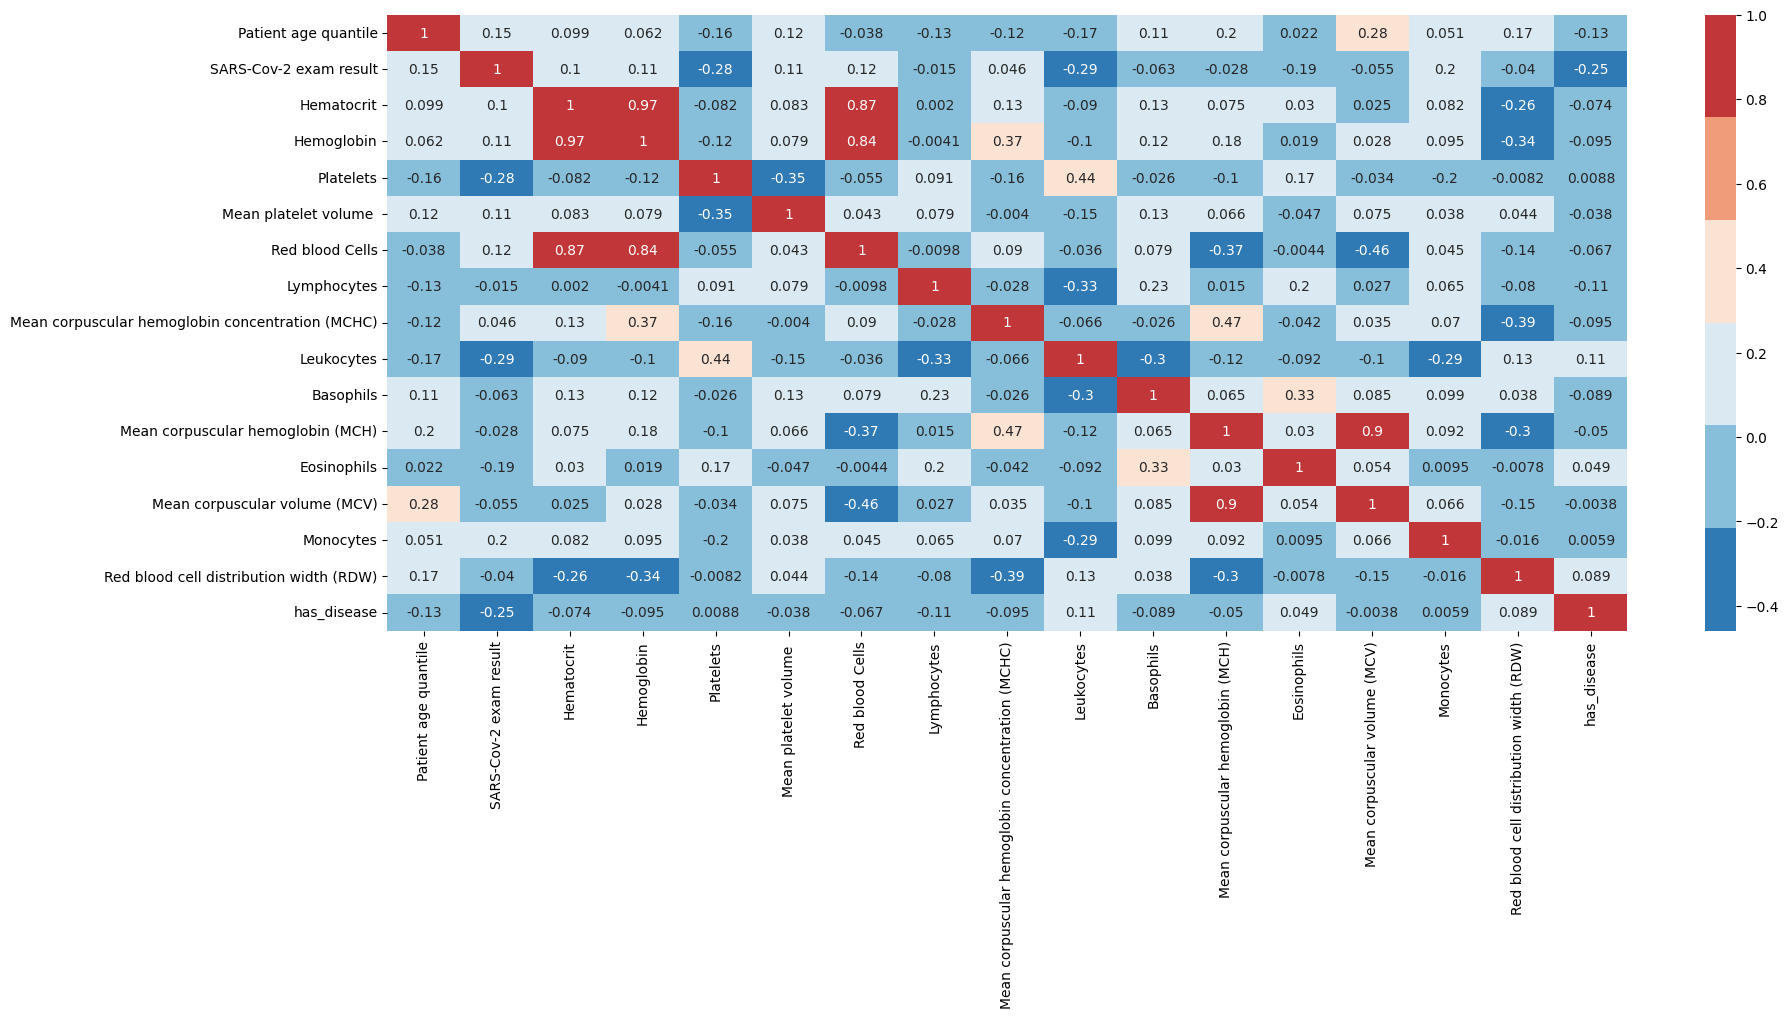

In [47]:
corr = df_feat.drop(['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)', 
             'Patient addmited to semi-intensive unit (1=yes, 0=no)',
             'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1).corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette('RdBu_r'), 
            annot=True)

plt.show()

Here, leukocytes, platelets and has_disease have a correlation close to -0.3 - these will be important variables. On the other hand, monocytes and age have a slight positive correlation.

Some features have a strong correlation in themselves, so we need to make decisions to reduce the noise. Hematocrit and Hemoglobin basically mean the same thing (correlation of 0.97). They also correlate very strongly with red blood cells (0.87 and 0.84, respectively). Their correlations with the target are also very similar, so I'll keep the one with the highest (red blood cells, 0.12). The other two highly correlated variables are MCV and MCH - in this case, MCV is more correlated with the target (-0.055 vs. -0.028), so I'll keep it.

In [48]:
df_feat = df_feat.drop(['Mean corpuscular hemoglobin (MCH)', 'Hematocrit', 'Hemoglobin'], axis=1)
#update features
features = [f for f in features if f not in ['Mean corpuscular hemoglobin (MCH)', 'Hematocrit', 'Hemoglobin']]

In [49]:
df_feat

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
1,126e9dd13932f68,17,0,0,0,0,-0.517413,1.067657e-02,0.102004,0.318366,-0.950790,-0.094610,-0.223767,1.482158,0.166192,3.575467e-01,-0.625073,1.0
8,8bb9d64f0215244,1,0,0,1,0,1.429667,-1.672222e+00,-0.850035,-0.005738,3.331071,0.364550,-0.223767,1.018625,-1.336024,6.865151e-02,-0.978899,0.0
15,6c9d3323975b082,9,0,0,0,0,-0.429480,-2.137107e-01,-1.361315,-1.114514,0.542882,-0.884923,0.081693,-0.666950,1.668409,1.276759e+00,-1.067355,1.0
18,d3ea751f3db9de9,11,0,0,0,0,0.072992,-5.502895e-01,0.542763,0.045436,-0.452899,-0.211488,-0.834685,-0.709090,0.606842,-2.202439e-01,0.171035,1.0
22,2c2eae16c12a18a,9,0,0,0,0,-0.668155,1.020415e+00,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.709090,0.566783,2.012129e+00,0.613318,0.0
28,fc41531ca4faf1e,13,0,0,0,0,-0.178244,7.960289e-01,0.489872,-0.730707,-0.353319,-0.075131,2.525365,0.217977,0.767079,6.865151e-02,0.171035,1.0
29,891d0f6449ff3d7,14,0,0,0,0,0.361914,-5.502895e-01,0.436981,-0.227493,0.642463,0.105751,-0.529226,-0.371974,0.386517,1.211779e-01,-0.713529,0.0
30,ebdd7c67fcb21b4,9,0,1,0,0,0.952319,-8.868694e-01,-0.321124,-0.875701,-0.253742,-0.286623,-0.223767,-0.540532,-0.675050,8.040212e-01,-0.890442,1.0
32,296adf066a9bf03,8,0,0,0,0,0.072992,5.716427e-01,0.066744,1.239503,-0.652057,-0.545423,0.998070,0.133698,0.246311,-4.828759e-01,-0.094334,0.0
34,0b1e43c5e3fb1d1,17,0,0,0,0,-0.278739,1.581381e+00,0.701437,-0.261609,1.040773,0.000005,0.387152,0.049419,-0.014074,-5.091391e-01,-0.094334,1.0


In [50]:
df_feat.shape

(602, 18)

In [51]:
df_cleared= df_feat.to_excel("/Users/user/Documents/Projet_Covid/Data/df_cleared.xlsx", index = True)